In [1]:
#!/usr/bin/env python
# coding: utf-8

#Make sure you have the ritht folder structure
#../data/Shapefile
# .../data/Shapefile/South_Africa_Zips


import subprocess
import requests
import urllib.request
import zipfile
import os
import shutil
import geopandas as gpd
from bs4 import BeautifulSoup
import urllib.request
from os import listdir
from os.path import isfile, join
import pandas as pd
import ee
import os
import glob
from zipfile import ZipFile
import datetime as dt


In [2]:
ee.Authenticate()

Enter verification code: 4/1AY0e-g4LZ-AIYcRnsRCQsfY2GMVGVLRJNds862DZea6cFDCBaz2EjMGWMKI

Successfully saved authorization token.


In [3]:
ee.Initialize()

In [4]:
ex = ['.shp', '.prj', '.dbf', '.shx']
file_paths = []
i=1

def zipshape(directory,export):
    for (root, directories, files) in os.walk(directory):
        for filename in files:
            if filename.endswith('.shp'):
                file_paths=[]
                filebase = filename.split('.')[0]
                try:
                    for things in ex:
                        if os.path.exists(os.path.join(root, filebase+things)):
                            filepath = os.path.join(root, filebase+things)
                            #print(filepath)
                            file_paths.append(filepath)
                    os.chdir(export)
                    if not os.path.exists(filebase+'.zip') and int(len(file_paths))==int(4):
                        with ZipFile(filebase+'.zip','w') as zip:
                            print("Creating zipped folder "+str(filebase)+'.zip'+' at '+str(export))
                            # writing each file one by one
                            for file in file_paths:
                                fname=os.path.basename(file)
                                zip.write(file,fname)
                    else:
                        print('File already exists: '+str(filebase+'.zip')+' SKIPPING')
                except:
                    pass


In [5]:
os.getcwd()

'C:\\Users\\BOttow\\Documents\\IPC'

In [6]:
mypath = "C:/Users/BOttow/Documents/IPC/data/Shapefile"
#for souther Africa the URL will be the follwoing 

#make the files data/Shapefile/South_Africa_Zips/

In [8]:
url_download_list_zip = []

for pagenum in range (0,100):
    # Main page url for east africa
    #url = "http://fews.net/fews-data/333?tid=23&field_data_portal_date_start%5Bvalue%5D%5Byear%5D=&field_data_portal_date_start%5Bvalue%5D%5Bmonth%5D=&field_data_portal_date_end%5Bvalue%5D%5Byear%5D=&field_data_portal_date_end%5Bvalue%5D%5Bmonth%5D=&page={0}".format(pagenum)
    url = "https://fews.net/fews-data/333?tid=34&field_data_portal_date_start%5Bvalue%5D%5Byear%5D=2009&field_data_portal_date_start%5Bvalue%5D%5Bmonth%5D=1&field_data_portal_date_end%5Bvalue%5D%5Byear%5D=2020&field_data_portal_date_end%5Bvalue%5D%5Bmonth%5D=12&page={0}".format(pagenum)

    print("Page number:" + str(pagenum))
    resp = urllib.request.urlopen(url)
    soup = BeautifulSoup(resp, from_encoding=resp.info().get_param('charset'))
    link_list = []
    
    # Find all links from main page
    for link in soup.find_all('a', href=True): 
        link_list.append(link['href'])
        
    # if it contains node, it mains that there is data on that page number
    if any("/node/" in s for s in link_list):
        
        # we only need the content link that links to the zipfile data (shapefiles)
        url_download_list = [s for s in link_list if "/content/" in s]
        
        #Find all zip files and on that link and save that in a list
        for downloadurl in url_download_list:
            resp = urllib.request.urlopen("http://fews.net/{0}".format(downloadurl))
            soup = BeautifulSoup(resp, "lxml", from_encoding=resp.info().get_param('charset'))
            
            link_list = []
            for link in soup.find_all('a', href=True): 
                link_list.append(link['href'])
            url_download_list_zip.append([s for s in link_list if ".zip" in s][0])  
    else:
        break
        
# zip occurs twice in the extracted website link list, remove duplicates:        
url_download_list_zip = list(set(url_download_list_zip))


Page number:0
Page number:1
Page number:2
Page number:3
Page number:4
Page number:5
Page number:6


In [9]:
url_download_list_zip

['http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201004.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201902.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201606.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201410.zip',
 'http://s3.amazonaws.com/shapefiles.fews.net/HFIC/SA/southern-africa202005.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201906.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201806.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201107.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201507.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201510.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa202006.zip',
 'http://shapefiles.fews.net.s3.amazonaws.com/HFIC/SA/southern-africa201101.zip',
 'http://shapefi

In [23]:
for zipfile_url in url_download_list_zip:

    filename = zipfile_url.rsplit('/', 1)[-1]

    print("Downloading shapefile {0}".format(filename))

    urllib.request.urlretrieve('{0}'.format(zipfile_url), '{0}/South_Africa_Zips/{1}'.format(mypath, filename))
    # Extract all files into a single folder:
    archive = zipfile.ZipFile('{0}/South_Africa_Zips/{1}'.format(mypath, filename), 'r')
    archive.extractall(path="{0}/South_Africa_Assets/".format(mypath))


In [15]:
# Convert files to zips in the folder

zipshape("C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets",
         "C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed")

File already exists: Lakes.zip SKIPPING
Creating zipped folder SA_200907_CS.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_200907_ML1.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_200907_ML2.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_200910_CS.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_200910_ML1.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_200910_ML2.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201001_CS.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201001_ML1.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zi

Creating zipped folder SA_201504_ML2.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201507_CS.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201507_ML1.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201507_ML2.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201510_CS.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201510_ML1.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201510_ML2.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201602_CS.zip at C:/Users/BOttow/Documents/IPC/data/Shapefile/South_Africa_Assets_Processed
Creating zipped folder SA_201602_ML1.zip at C:/User

In [16]:
# order into three folders 
mypath2='C:/Users/BOttow/Documents/IPC/data/Shapefile'
onlyfiles = [f for f in listdir(mypath2 + "/South_Africa_Assets_Processed/") if isfile(join(mypath2 + "/South_Africa_Assets_Processed/", f))]
# do this only one time 
try:
    shutil.rmtree(mypath2 + r"/CS") 
    shutil.rmtree(mypath2 + r"/ML1") 
    shutil.rmtree(mypath2 + r"/ML2") 
except:
    print("directory doesn't excist yet")
os.mkdir(mypath2 + r"/CS")
os.mkdir(mypath2 + r"/ML1")
os.mkdir(mypath2 + r"/ML2")


In [17]:
[s for s in onlyfiles if "CS" in s]

['SA_200907_CS.zip',
 'SA_200910_CS.zip',
 'SA_201001_CS.zip',
 'SA_201004_CS.zip',
 'SA_201007_CS.zip',
 'SA_201010_CS.zip',
 'SA_201101_CS.zip',
 'SA_201104_CS.zip',
 'SA_201107_CS.zip',
 'SA_201110_CS.zip',
 'SA_201201_CS.zip',
 'SA_201204_CS.zip',
 'SA_201207_CS.zip',
 'SA_201210_CS.zip',
 'SA_201301_CS.zip',
 'SA_201304_CS.zip',
 'SA_201307_CS.zip',
 'SA_201310_CS.zip',
 'SA_201401_CS.zip',
 'SA_201404_CS.zip',
 'SA_201407_CS.zip',
 'SA_201410_CS.zip',
 'SA_201501_CS.zip',
 'SA_201504_CS.zip',
 'SA_201507_CS.zip',
 'SA_201510_CS.zip',
 'SA_201602_CS.zip',
 'SA_201606_CS.zip',
 'SA_201610_CS.zip',
 'SA_201702_CS.zip',
 'SA_201706_CS.zip',
 'SA_201710_CS.zip',
 'SA_201802_CS.zip',
 'SA_201806_CS.zip',
 'SA_201810_CS.zip',
 'SA_201812_CS.zip',
 'SA_201902_CS.zip',
 'SA_201906_CS.zip',
 'SA_201910_CS.zip',
 'SA_202002_CS.zip',
 'SA_202006_CS.zip',
 'SA_202010_CS.zip',
 'WA_202002_CS.zip']

In [18]:
CS = [s for s in onlyfiles if "CS" in s]

for file in CS:
    shutil.move(mypath2 + "/South_Africa_Assets_Processed/" + file, mypath2 + "/CS")
#Note the name of the files, in orgininal script of Aki he is using EA201702_CS linked to the eastern africa ipc outlooks,
#in this case we are interested in Southern Africa, so SA201702_CS
#os.rename(mypath2 + r"/CS/SA201702_CS.zip", mypath2 + r"/CS/SA_201702_CS.zip")
ML1 = [s for s in onlyfiles if "ML1" in s]

for file in ML1:
    shutil.move(mypath2 + "/South_Africa_Assets_Processed/" + file, mypath2 + "/ML1")
    
ML2 = [s for s in onlyfiles if "ML2" in s]
for file in ML2:
    shutil.move(mypath2 + "/South_Africa_Assets_Processed/" + file, mypath2 + "/ML2")


In [19]:
#mypath2='D:/Drought_IBF/zwe/data/Shapefile'

CS = [f for f in listdir(mypath2 + "/CS/") if isfile(join(mypath2 + "/CS/", f))]
ML1 = [f for f in listdir(mypath2 + "/ML1/") if isfile(join(mypath2 + "/ML1/", f))]
ML2 = [f for f in listdir(mypath2 + "/ML2/") if isfile(join(mypath2 + "/ML2/", f))]

In [20]:
path='C:/Users/BOttow/Documents/IPC/data'
print(CS)
mypath2

['SA_200907_CS.zip', 'SA_200910_CS.zip', 'SA_201001_CS.zip', 'SA_201004_CS.zip', 'SA_201007_CS.zip', 'SA_201010_CS.zip', 'SA_201101_CS.zip', 'SA_201104_CS.zip', 'SA_201107_CS.zip', 'SA_201110_CS.zip', 'SA_201201_CS.zip', 'SA_201204_CS.zip', 'SA_201207_CS.zip', 'SA_201210_CS.zip', 'SA_201301_CS.zip', 'SA_201304_CS.zip', 'SA_201307_CS.zip', 'SA_201310_CS.zip', 'SA_201401_CS.zip', 'SA_201404_CS.zip', 'SA_201407_CS.zip', 'SA_201410_CS.zip', 'SA_201501_CS.zip', 'SA_201504_CS.zip', 'SA_201507_CS.zip', 'SA_201510_CS.zip', 'SA_201602_CS.zip', 'SA_201606_CS.zip', 'SA_201610_CS.zip', 'SA_201702_CS.zip', 'SA_201706_CS.zip', 'SA_201710_CS.zip', 'SA_201802_CS.zip', 'SA_201806_CS.zip', 'SA_201810_CS.zip', 'SA_201812_CS.zip', 'SA_201902_CS.zip', 'SA_201906_CS.zip', 'SA_201910_CS.zip', 'SA_202002_CS.zip', 'SA_202006_CS.zip', 'SA_202010_CS.zip', 'WA_202002_CS.zip']


'C:/Users/BOttow/Documents/IPC/data/Shapefile'

In [21]:
############ ZIMBABWE

#D:/Drought_IBF/zwe/data/ZW_LHZ_2011/ZW_LHZ_2011.shp

zwe_lzh=gpd.read_file('C:/Users/BOttow/Documents/IPC/data/ZW_LHZ_2011/ZW_LHZ_2011.shp')
district =gpd.read_file('C:/Users/BOttow/Documents/IPC/data/admin_2/pop.shp')

df_list=list()
for file in CS[20:-1]:
    CS_ = gpd.read_file('zip://' +mypath2 + "/CS/" +file)
    #gdf_lhz_cs_merged = gpd.sjoin(zwe_lzh, CS_,how='left')
    gdf_lhz_cs_merged = gpd.sjoin(district, CS_,how='left')    
    #df=gdf_lhz_cs_merged[['FNID','CS']].query('CS < 6')
    df=gdf_lhz_cs_merged[['ADM2_PCODE','CS','pp_sumsum']].query('CS < 6')
    df=df.iloc[df.reset_index().groupby(['ADM2_PCODE'])['CS'].idxmax()]
    x=file.split('_')[1] 
    df['Date']=dt.datetime(int(x[:4]),int(x[4:]),1).strftime("%Y-%m-%d")
    df['year']=int(x[:4])
    df_list.append(df.query('CS != "NaN"'))
    
df1 = pd.concat(df_list)

In [22]:
df1.to_csv('zwe_ipc.csv')

In [23]:
df1

,ADM2_PCODE,CS,pp_sumsum,Date,year
8,ZW1021,1.0,5.211705e+05,2014-07-01,2014
7,ZW1101,1.0,2.678951e+05,2014-07-01,2014
14,ZW1102,1.0,1.517463e+05,2014-07-01,2014
16,ZW1103,1.0,3.426061e+05,2014-07-01,2014
49,ZW1104,1.0,3.317067e+05,2014-07-01,2014
...,...,...,...,...,...
19,ZW1822,2.0,8.375239e+03,2020-10-01,2020
34,ZW1921,3.0,1.508515e+06,2020-10-01,2020
21,ZW1922,2.0,2.663541e+05,2020-10-01,2020
23,ZW1923,2.0,1.609804e+05,2020-10-01,2020


In [24]:
# Merge conflict events with regions they occurred in
fig, ax = plt.subplots(figsize = (12,10)) 
#ax.axis("off")
#gdf_lhz_cs_merged =gpd.overlay(moz_lzh, moz_lzh1, how='intersection', make_valid=True)
df1 = df1.astype({"pp_sumsum": int})
df1['pop']= df1['pp_sumsum'] 
df2=df1.groupby(['CS','year']).sum().reset_index()
df2.query('CS>2').plot.bar(x='year',y= 'pop',ax=ax,legend=False)
 
#plt.clim(1,5) 
#POSTO.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .1,ax=ax)
plt.title('Population exposed to IPC-phase 3 or above',fontsize='16')
#ax.set_xticks([0.1, 0.5, 0.7])
ax.set_yticklabels(['0','2m', '4m','6m','8m','10m' ,'12m'],fontsize='16')
ax.set_ylabel('Exposed population ',fontsize='16')
plt.axhline(y=6000000, color='r', linestyle='dashed', label='20% of Total population')
plt.axhline(y=3000000, color='g', linestyle='dashed', label='10% of Total population') 
plt.legend()

NameError: name 'plt' is not defined

In [39]:
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
 
import descartes 
import mapclassify
from matplotlib.pyplot import figure 
# Several plots will be generated with the function plot_geo:
def plot_geo_acc(df1, district,year):
    fig, ax = plt.subplots(figsize = (20,10)) 
    ax.axis("off")
    df1=df1.query('CS > 1')
    df1 = df1.astype({"CS": int})
    #colors2=["#bababa","#e0e0e0","#ffffff","#fb6a4a","#de2d26"]
    colors2=['#f0f9e8','#ffffb2','#fe9929','#e31a1c','#d94701']
    cmap1 = ListedColormap(colors2)
    df1.plot(column = 'CS',ax=ax, legend = False, cmap =cmap1,linewidth=0.1, edgecolor='0.8',vmin=1, vmax=5)
    #plt.clim(1,5) 
    district.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .1,ax=ax)
    plt.title('FEWS NET IPC-%s '%year)

    #cb = plt.colorbar()
    ##labels = np.arange(1,5,1)
    #loc    = labels + .5
    #cb.set_ticks(loc)
    #cb.set_ticklabels(labels)
 

AttributeError: 'Line2D' object has no property 'column'

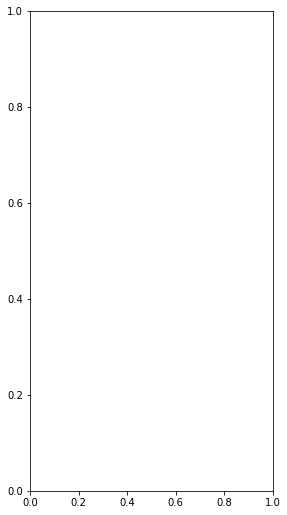

In [40]:

fig1= plt.figure( figsize=(20, 30))
c=0
for i in range(1,13):
    
    ax = fig1.add_subplot(3, 4, i)  # create an axes object in the figure
    
    plot_df=df1.query('year==%s'% (2009+c))
    year='-%s'% (2009+c)
    df=plot_df.query('CS > 1')
    df = df.astype({"CS": int})
    #colors2=["#bababa","#e0e0e0","#ffffff","#fb6a4a","#de2d26"]
    #colors2=['#f6eff7','#f0f9e8','#ffffb2','#fe9929','#e31a1c','#d94701']
    colors2=['#f0f9e8','#bae4bc','#ffffb2','#fe9929','#e31a1c','#59140d']
    cmap1 = ListedColormap(colors2)
    s1=plot_df.plot(column = 'CS',ax=ax, legend = False, cmap =cmap1,linewidth=0.02, edgecolor='0.4',vmin=-0.5, vmax=6)
    ax.axis('off')
    #plt.clim(1,5) 
    #POSTO.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .1,ax=ax)
    plt.title('IPC-%s '%year,fontsize='30')
    #fig.colorbar(cs, ax=ax, shrink=0.9)
    c=c+1
    plt.tight_layout()
 

In [ ]:

fig1= plt.figure( figsize=(20, 30))
ax = fig1.add_subplot(1,1, 1)  # create an axes object in the figure
c=0
plot_df=df_posto1_merged.query('year==%s'% (2009+c))
year='year %s'% (2009+c)
df=plot_df.query('CS > 1')
df = df.astype({"CS": int})
#colors2=["#bababa","#e0e0e0","#ffffff","#fb6a4a","#de2d26"]
colors2=['#f0f9e8','#bae4bc','#ffffb2','#fe9929','#e31a1c','#59140d']
cmap1 = ListedColormap(colors2)
s1=plot_df.plot(column = 'CS',ax=ax, legend = True, cmap =cmap1,linewidth=0.1, edgecolor='0.8',vmin=-0.5, vmax=6)
ax.axis('off')
#plt.clim(1,5) 
#POSTO.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .1,ax=ax)
plt.title('IPC-%s '%year,fontsize='36')
#fig.colorbar(cs, ax=ax, shrink=0.9)
c=c+1

plt.tight_layout()

In [ ]:

fig, ax = plt.subplots(3, 4, figsize=(40, 30))
ax=axes[1,1]
ax.set_aspect('equal')
#correlation_df_shapes.plot(column='X_11', ax=ax, legend=True) BuGn 'OrRd'
#colors2=["#ffffff","#bababa","#e0e0e0","#fb6a4a","#de2d26"]  
colors2=['#fee5d9','#fcae91','#fb6a4a','#de2d26','#a50f15']
cmap1 = ListedColormap(colors2)

correlation_df_shapes.plot(column='X_11',ax=ax,legend=True, cmap=cmap1,linewidth=0.8, edgecolor='0.8',#scheme='quantiles',
                           legend_kwds={'label': "Coorelation b/n movment and growth rate",'orientation': "horizontal"})
ax.axis('off')
 
gemmente_centroid_correlation_df.plot(ax=ax, marker='o', color='#3182bd', 
                                      markersize=.1*gemmente_centroid_correlation_df['Aantal_h'],
                                     label='Total cases')

plt.title('Coorelation b/n movment and growth rate for time shift of 11 days')
plt.legend()
plt.tight_layout()

#fig.savefig('11correlation_export.png', dpi=300)


In [ ]:

# # Merge to Frame

def createIPCframe(path):  
    all_files = glob.glob(path + "/*.csv")

    IPC_csv = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        IPC_csv.append(df)

    return(pd.concat(IPC_csv, axis=0, ignore_index=True)) 

